In [181]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_member = db['data_tour_member']
collection_days = db['data_tour_days']
data_members = collection_member.find()
data_days = collection_days.find()
df_members = pd.DataFrame(data_members)
df_days = pd.DataFrame(data_days)
df_days = df_days.query("year >= 2020")
df_members = df_members.query("year >= 2020")
df_members= df_members.rename(columns={'counts':'visitor_ratio'})
df_members= df_members.rename(columns={'class':'classification'})
df_days= df_days.rename(columns={'count':'visitor_counts'})
df_days= df_days.rename(columns={'class':'classification'})


In [182]:
df_days

,_id,classification,value,days,year,region,visitor_counts
34,6625c98ad556a4333f052057,전체,소계,숙박,2020,서울,3720
35,6625c98ad556a4333f052058,전체,소계,숙박,2020,부산,9364
36,6625c98ad556a4333f052059,전체,소계,숙박,2020,대구,1924
37,6625c98ad556a4333f05205a,전체,소계,숙박,2020,인천,3145
38,6625c98ad556a4333f05205b,전체,소계,숙박,2020,광주,1766
...,...,...,...,...,...,...,...
1695,6625c98ad556a4333f0526d4,연령,70세 이상,당일,2022,전북,672
1696,6625c98ad556a4333f0526d5,연령,70세 이상,당일,2022,전남,916
1697,6625c98ad556a4333f0526d6,연령,70세 이상,당일,2022,경북,896
1698,6625c98ad556a4333f0526d7,연령,70세 이상,당일,2022,경남,979


In [192]:
df_members

,_id,classification,value,days,year,member,visitor_ratio
12,6625c3e0d556a4333f05174a,전체,소계,숙박,2020,1명,5.4
13,6625c3e0d556a4333f05174b,전체,소계,숙박,2020,2~3명,50.8
14,6625c3e0d556a4333f05174c,전체,소계,숙박,2020,4~5명,36.7
15,6625c3e0d556a4333f05174d,전체,소계,숙박,2020,6~10명,6.5
16,6625c3e0d556a4333f05174e,전체,소계,숙박,2020,11~20명,0.6
...,...,...,...,...,...,...,...
585,6625c3e0d556a4333f051987,연령,70세 이상,당일,2022,2~3명,48.3
586,6625c3e0d556a4333f051988,연령,70세 이상,당일,2022,4~5명,35.9
587,6625c3e0d556a4333f051989,연령,70세 이상,당일,2022,6~10명,4.9
588,6625c3e0d556a4333f05198a,연령,70세 이상,당일,2022,11~20명,1.6


## 지역별 여행 일수에 따른 관광객 수 차이
- 서울, 경기, 인천, 세종을 제외한 지역은 숙박 여행이 더 많음
- 수도권과 가까운 서울,경기,인천은 당일여행이 더 많은 것으로 보임
- 강원, 제주는 숙박이 상당히 많은 것을 알 수 있음
  

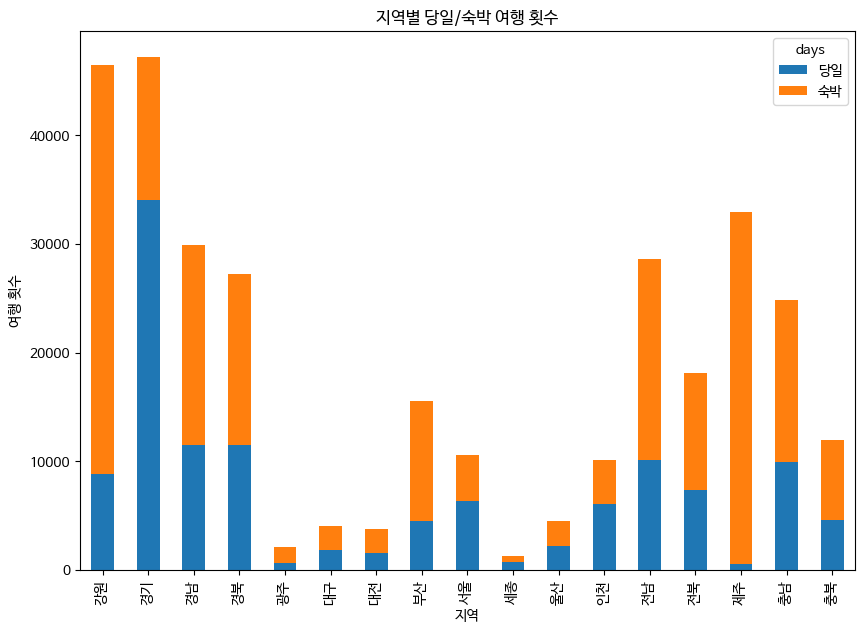

In [184]:
df_days_total = df_days.query("classification == '전체'")
pivot_days = pd.pivot_table(data=df_days_total, index='region',columns=['days'],values='visitor_counts',aggfunc='mean')
# 선 그래프 그리기
# concept 값이 0인 행 제거
pivot_days.plot(kind='bar', stacked=True, figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('지역별 당일/숙박 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()

## 지역별 성별에 따른 관광객 수 차이
- 전체적으로 비슷하지만 서울, 제주의 경우 여성이 좀 더 많음

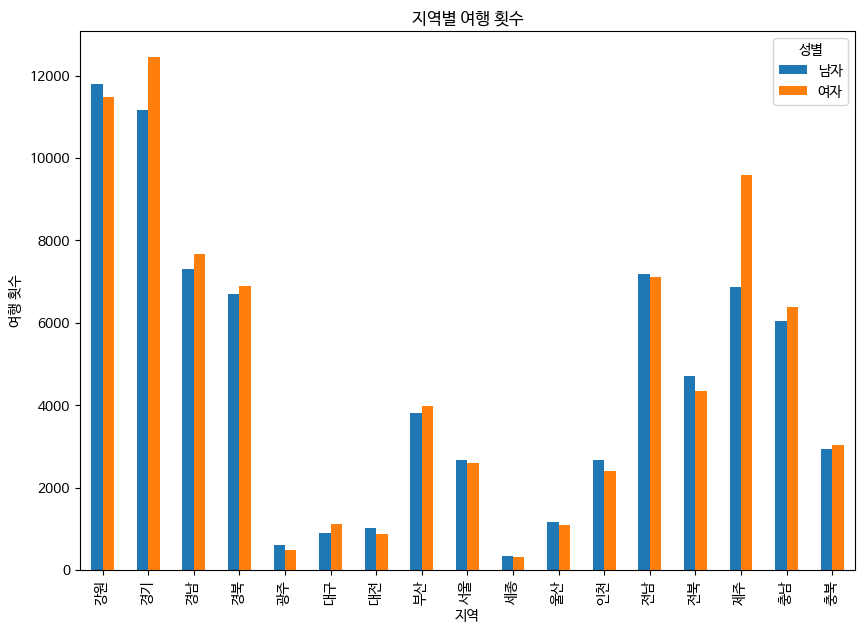

In [185]:
df_days_sex = df_days.query("classification == '성별'")
pivot_days_sex = pd.pivot_table(data=df_days_sex, index='region',columns=['value'],values='visitor_counts',aggfunc='mean')
ax = pivot_days_sex.plot(kind='bar',  figsize=(10, 7))
plt.title('지역별 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')
ax.legend(title="성별", loc='upper right')

plt.show()

## 지역별 연령대에 따른 관광객 수 차이
- 서울, 경기, 대구, 대전, 부산, 세종, 인천, 제주의 경우 2-30대가 더 많음
- 강원, 경남, 경북, 광주, 울산, 전남, 전북, 충남,충북의 경우 40-50대가 더 많음

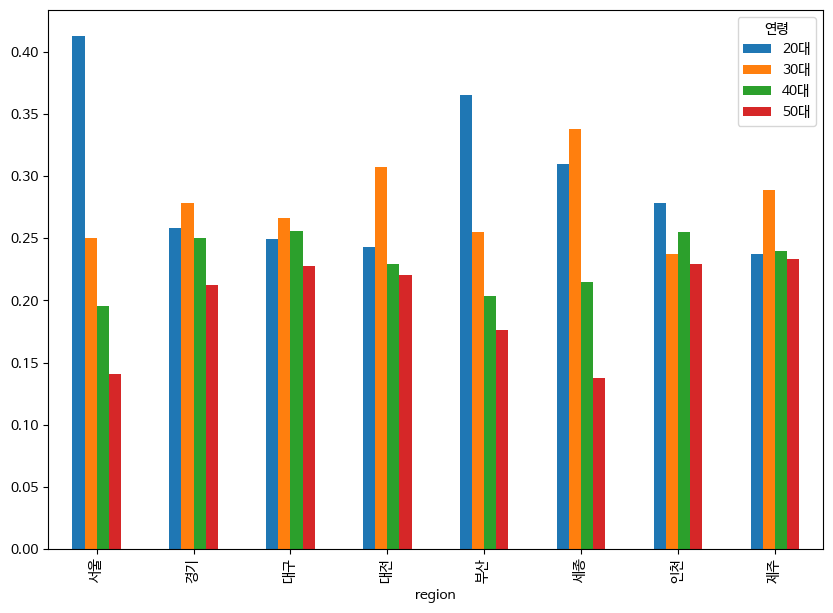

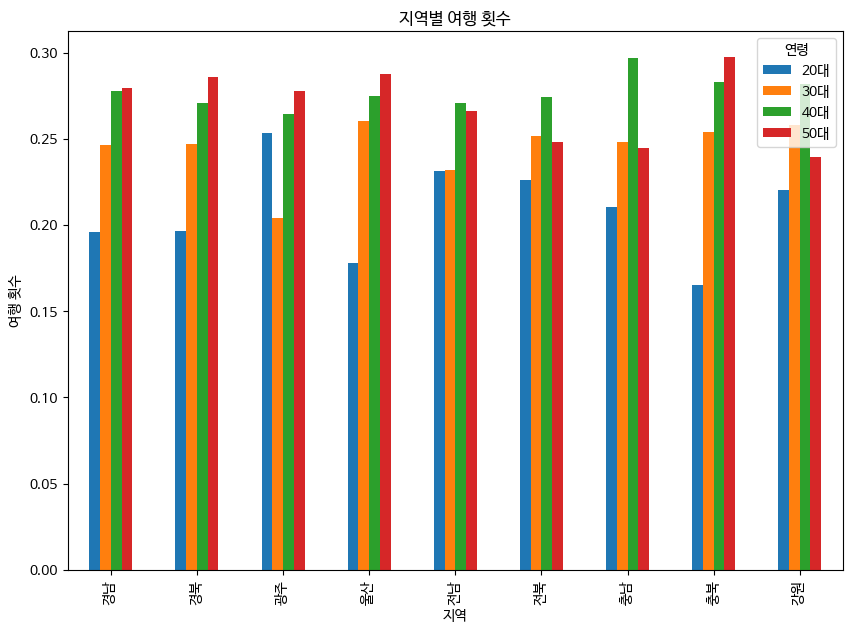

In [186]:
df_days_age = df_days.query("value in ['20대', '30대', '40대', '50대']")
pivot_days_age = pd.pivot_table(data=df_days_age, index='region',columns=['value'],values='visitor_counts',aggfunc='mean')
pivot_days_age_first = pivot_days_age.loc[['서울', '경기', '대구', '대전', '부산', '세종', '인천', '제주']]
pivot_days_age_second = pivot_days_age.loc[['경남', '경북', '광주', '울산', '전남', '전북', '충남', '충북', '강원']]

pivot_days_age_first = pivot_days_age_first.apply(lambda x: x / x.sum(), axis=1)
pivot_days_age_second = pivot_days_age_second.apply(lambda x: x / x.sum(), axis=1)

ax1 = pivot_days_age_first.plot(kind='bar',  figsize=(10, 7))
ax2 = pivot_days_age_second.plot(kind='bar',  figsize=(10, 7))
plt.title('지역별 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')
ax1.legend(title="연령", loc='upper right')
ax2.legend(title="연령", loc='upper right')

plt.show()

## 성별에 따른 여행 일수별 따른 관광객 수 차이
- 전체적으로 남성보다 여성이 더 많음  

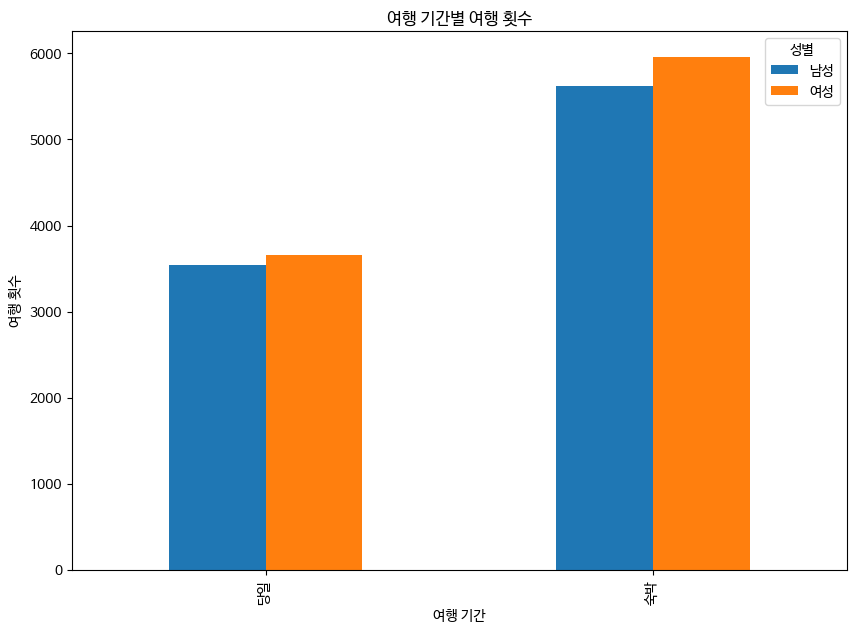

In [187]:
df_days_sex = df_days.query("classification == '성별'")
pivot_days_sex = pd.pivot_table(data=df_days_sex, index='days',columns=['value'],values='visitor_counts',aggfunc='mean')
ax = pivot_days_sex.plot(kind='bar',  figsize=(10, 7))
plt.title('여행 기간별 여행 횟수')
plt.xlabel('여행 기간')
plt.ylabel('여행 횟수')
ax.legend(title="성별", loc='upper right', labels=['남성', '여성'])

plt.show()

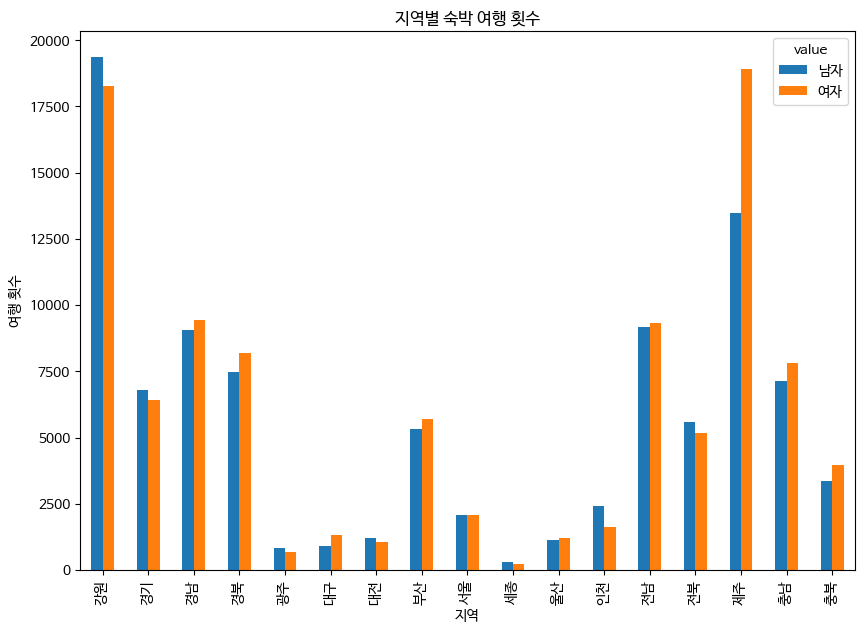

In [189]:
pivot_days_sex_accommodation = pd.pivot_table(data=df_days_sex.query("days=='숙박'"), index='region',columns=['value'],values='visitor_counts',aggfunc='mean')
pivot_days_sex_accommodation
# 선 그래프 그리기
pivot_days_sex_accommodation.plot(kind='bar',  figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('지역별 숙박 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()

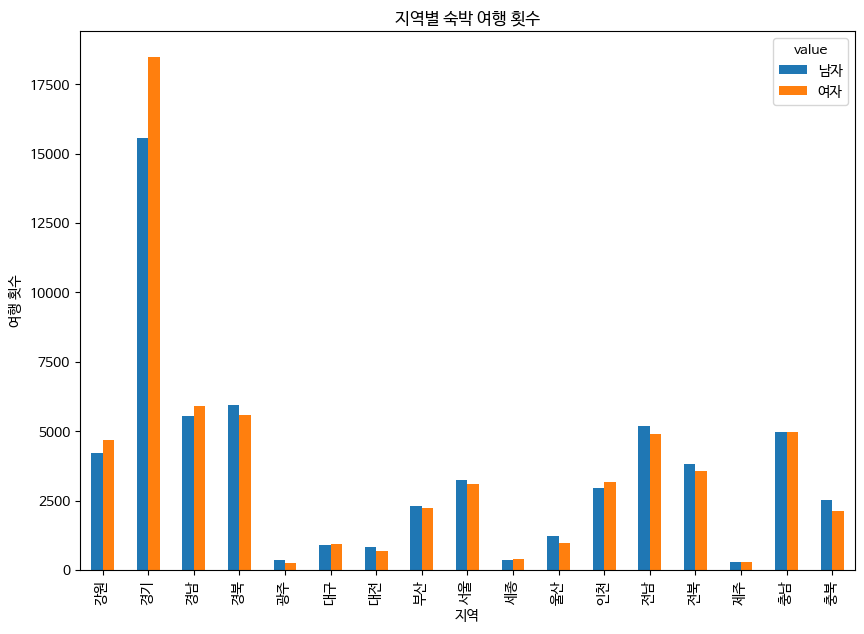

In [190]:
pivot_days_sex_day_trip = pd.pivot_table(data=df_days_sex.query("days=='당일'"), index='region',columns=['value'],values='visitor_counts',aggfunc='mean')
pivot_days_sex_day_trip
# 선 그래프 그리기
pivot_days_sex_day_trip.plot(kind='bar',  figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('지역별 숙박 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()

## 연령대별 여행 일수에 따른 관광객 수 차이
- 전체적으로 남성보다 여성이 더 많음  

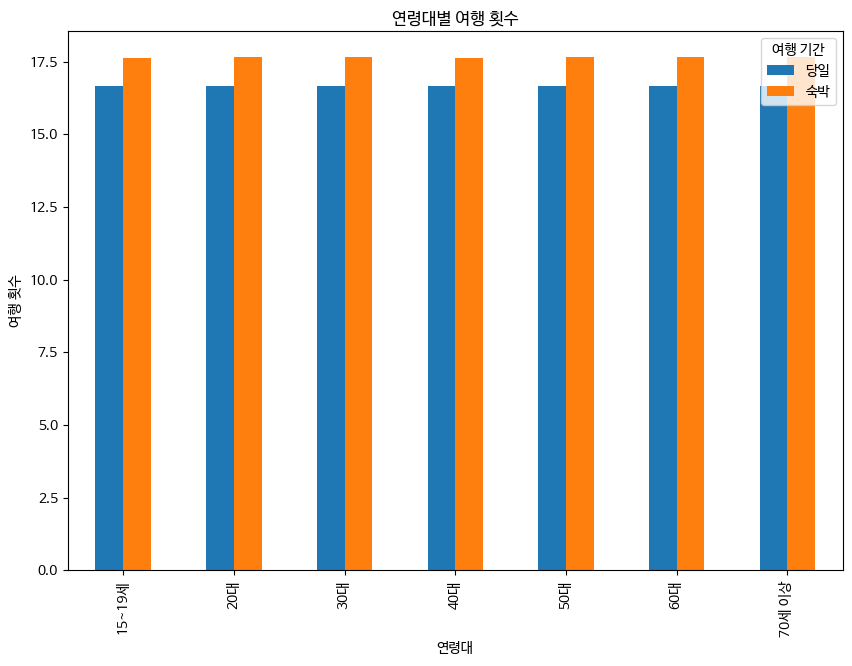

In [180]:
df_members_age = df_members.query("classification == '연령'")
pivot_members_age = pd.pivot_table(data=df_members_age, index='value',columns=['days'],values='visitor_counts',aggfunc='mean')
ax = pivot_members_age.plot(kind='bar',  figsize=(10, 7))
plt.title('연령대별 여행 횟수')
plt.xlabel('연령대')
plt.ylabel('여행 횟수')
ax.legend(title="여행 기간", loc='upper right')

plt.show()

## 여행 인원별 여행 일수에 따른 관광객 수 차이
- 2~3명이 가장 많고, 그 다음으로 4-5명이 많음
- 2~3명을 제외한 대부분의 경우 숙박 여행이 더 많음

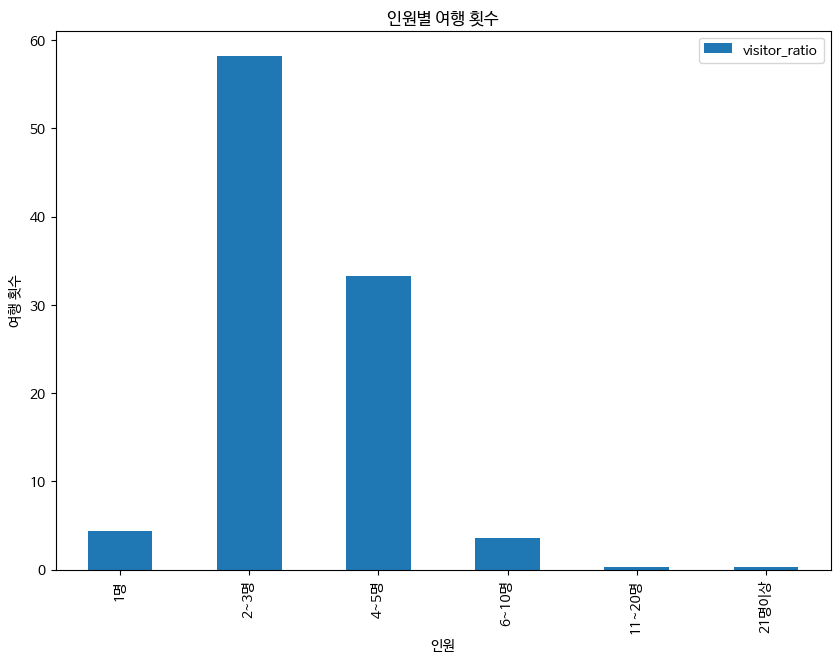

In [219]:
df_members_total = df_members.query("classification == '전체'")
pivot_members = pd.pivot_table(data=df_members_total, index='member',values='visitor_ratio',aggfunc='mean')
pivot_members = pivot_members.reindex(['1명','2~3명','4~5명','6~10명','11~20명','21명이상'])
# 선 그래프 그리기
# concept 값이 0인 행 제거
pivot_members.plot(kind='bar', figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('인원별 여행 횟수')
plt.xlabel('인원')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()

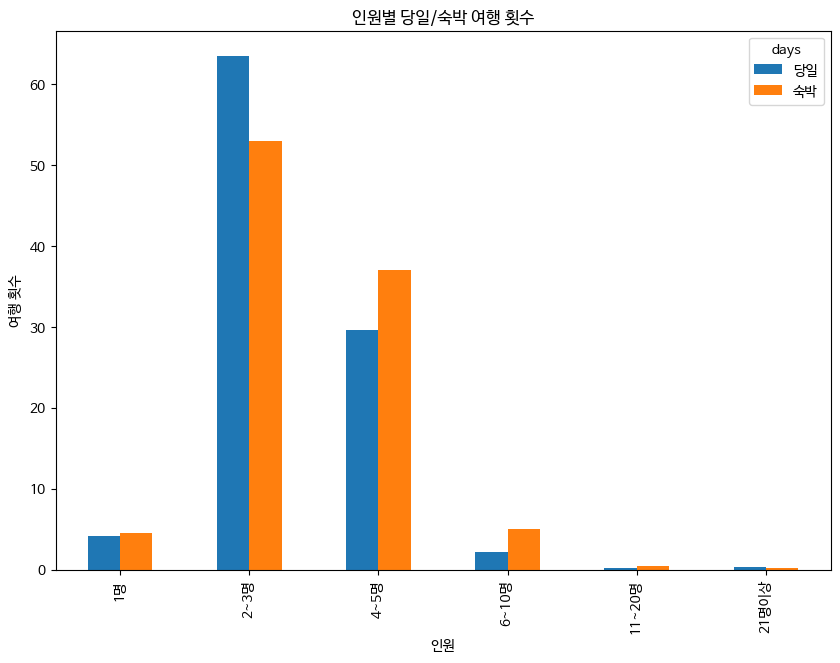

In [214]:
df_members_total = df_members.query("classification == '전체'")
pivot_members = pd.pivot_table(data=df_members_total, index='member',columns=['days'],values='visitor_ratio',aggfunc='mean')
pivot_members = pivot_members.reindex(['1명','2~3명','4~5명','6~10명','11~20명','21명이상'])
# 선 그래프 그리기
# concept 값이 0인 행 제거
pivot_members.plot(kind='bar', figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('인원별 당일/숙박 여행 횟수')
plt.xlabel('인원')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()

## 여행 인원별 성별에 따른 관광객 수 차이
- 2-3명이 가장 많고, 그 다음으로 4-5명이 많음
- 2~3명을 제외한 대부분의 경우 숙박 여행이 더 많음

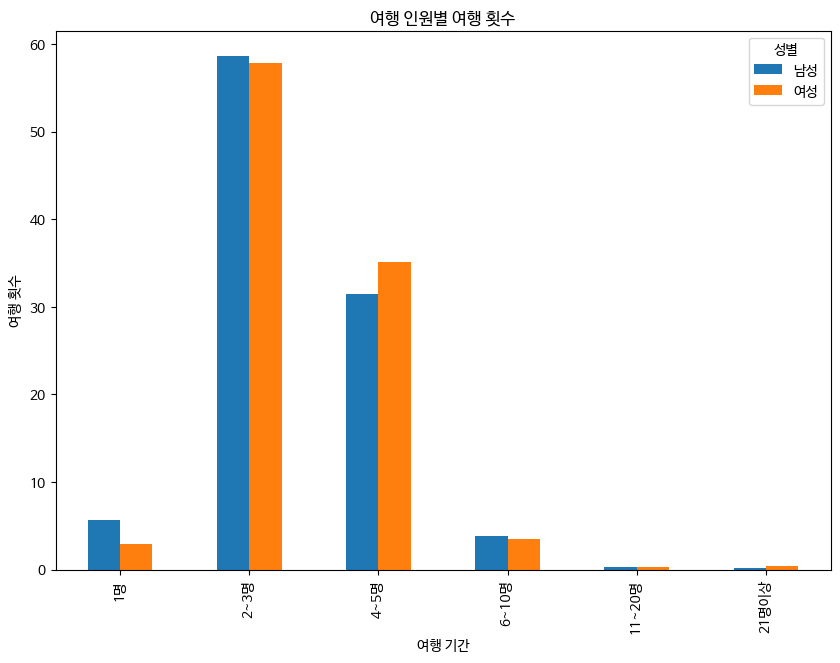

In [224]:
df_members_sex = df_members.query("classification == '성별'")
pivot_members_sex = pd.pivot_table(data=df_members_sex, index='member',columns=['value'],values='visitor_ratio',aggfunc='mean')
pivot_members_sex = pivot_members_sex.reindex(['1명','2~3명','4~5명','6~10명','11~20명','21명이상'])
# 선 그래프 그리기
# concept 값이 0인 행 제거
# 그래프 제목, x축 레이블, y축 레이블 설정
ax = pivot_members_sex.plot(kind='bar',  figsize=(10, 7))
plt.title('여행 인원별 여행 횟수')
plt.xlabel('여행 기간')
plt.ylabel('여행 횟수')
ax.legend(title="성별", loc='upper right', labels=['남성', '여성'])

# 그래프 표시
plt.show()

## 여행 인원별 연령대에 따른 관광객 수 차이
- 3명 이하는 남성이 더 많고, 4-5명의 경우 여성이 더 많음 

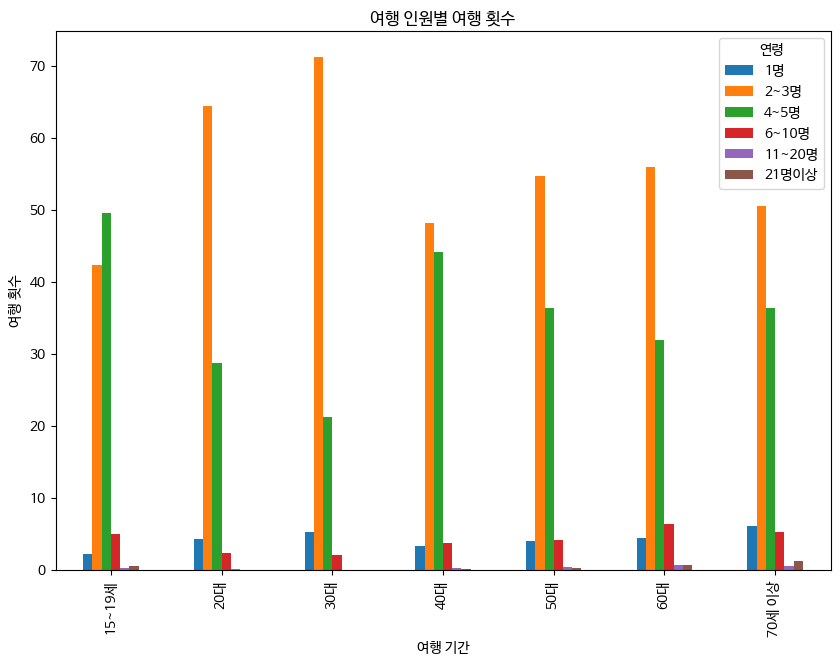

In [233]:
df_members_age = df_members.query("classification == '연령'")
pivot_members_age = pd.pivot_table(data=df_members_age, index='value',columns=['member'],values='visitor_ratio',aggfunc='mean')
pivot_members_age = pivot_members_age[['1명','2~3명','4~5명','6~10명','11~20명','21명이상']]
# 선 그래프 그리기
# concept 값이 0인 행 제거
# 그래프 제목, x축 레이블, y축 레이블 설정
ax = pivot_members_age.plot(kind='bar',  figsize=(10, 7))
plt.title('여행 인원별 여행 횟수')
plt.xlabel('여행 기간')
plt.ylabel('여행 횟수')
ax.legend(title="연령", loc='upper right')

# 그래프 표시
plt.show()

## 성별에 따른 여행 일수별 관광객 수 차이
- 숙박, 당일 여행 모두 남성, 여성 차이가 별로 없음
- 당일 여행, 숙박 여행간의 차이는 거의 없음

In [244]:
pivot_members_sex

value,남자,여자
days,,
당일,16.672222,16.666667
숙박,17.652941,17.647059


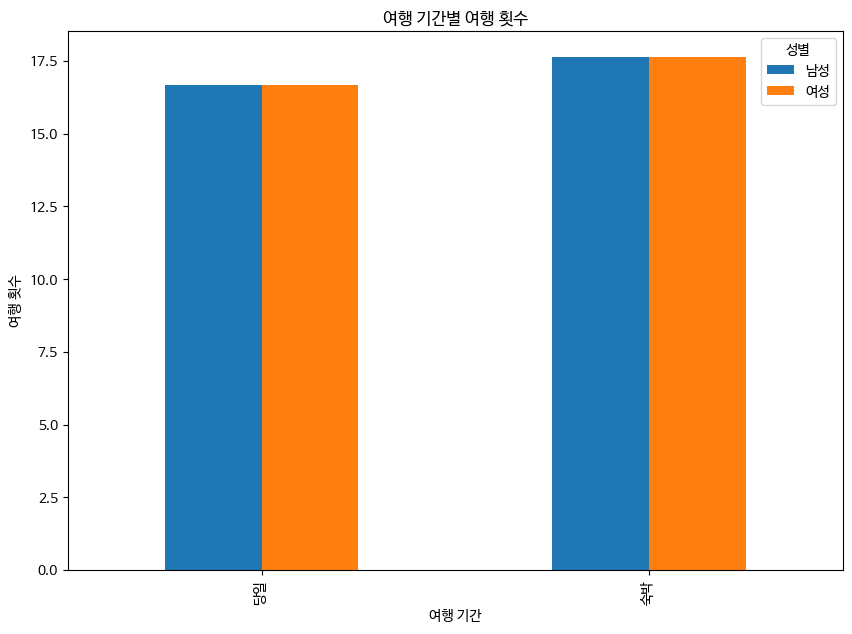

In [243]:
df_members_sex = df_members.query("classification == '성별'")
pivot_members_sex = pd.pivot_table(data=df_members_sex, index='days',columns=['value'],values='visitor_ratio',aggfunc='mean')
ax = pivot_members_sex.plot(kind='bar',  figsize=(10, 7))
plt.title('여행 기간별 여행 횟수')
plt.xlabel('여행 기간')
plt.ylabel('여행 횟수')
ax.legend(title="성별", loc='upper right', labels=['남성', '여성'])

plt.show()

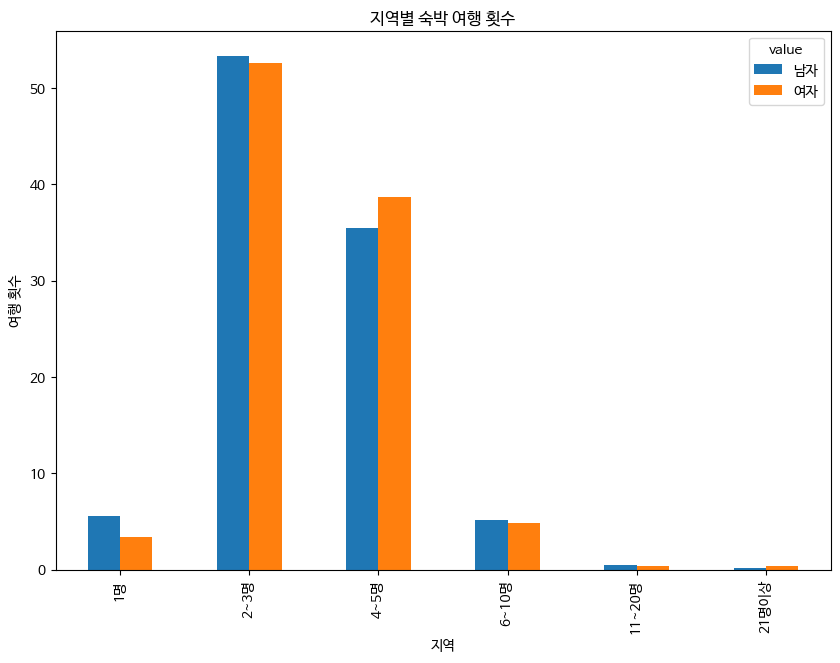

In [242]:
pivot_members_sex_accommodation = pd.pivot_table(data=df_members_sex.query("days=='숙박'"), index='member',columns=['value'],values='visitor_ratio',aggfunc='mean')
pivot_members_sex_accommodation
pivot_members_sex_accommodation = pivot_members_sex_accommodation.reindex(['1명','2~3명','4~5명','6~10명','11~20명','21명이상'])
# 선 그래프 그리기
pivot_members_sex_accommodation.plot(kind='bar',  figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('지역별 숙박 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()

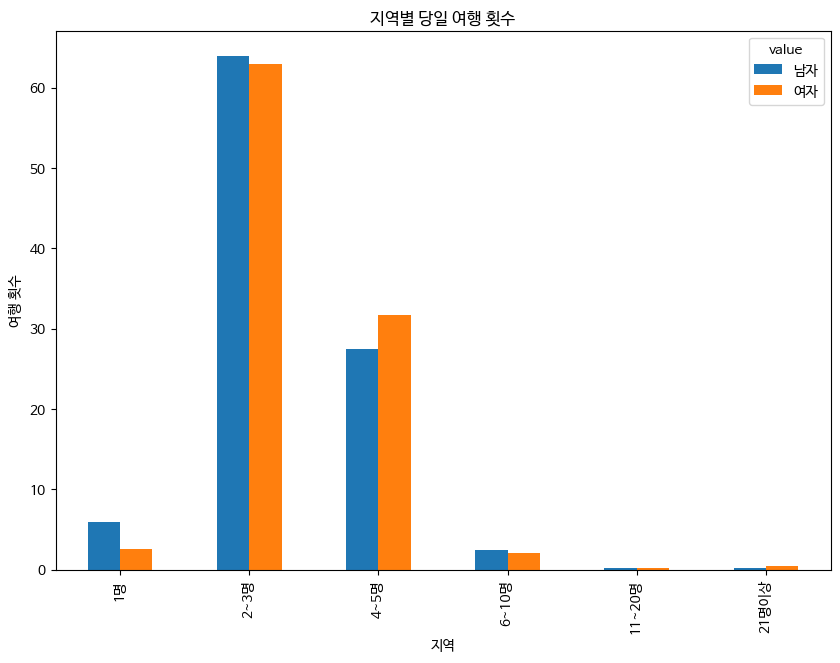

In [241]:
pivot_members_sex_day = pd.pivot_table(data=df_members_sex.query("days=='당일'"), index='member',columns=['value'],values='visitor_ratio',aggfunc='mean')
pivot_members_sex_day
pivot_members_sex_day = pivot_members_sex_day.reindex(['1명','2~3명','4~5명','6~10명','11~20명','21명이상'])
# 선 그래프 그리기
pivot_members_sex_day.plot(kind='bar',  figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('지역별 당일 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()